# Reconocimiento facial

## Entrenamiento del modelo

Definimos las funciones para transformar las emociones y las imágenes en array

In [18]:
def transform(n):
    arr = [0] * 3
    if n == 0: 
        arr[0] = 1
    else:
        arr[n] = 1
    return np.array(arr)

In [19]:
def procImg(s):
    s=np.array([int(i) for i in s.split()]).reshape(48,48,1)
    return s

Separamos la **y** y la **X**

In [20]:
y = facial.iloc[:, 0].values
y = np.array([transform(i) for i in y])

In [21]:
X=np.array([procImg(i) for i in facial.iloc[:,1].values])

Imagen en la posición 1

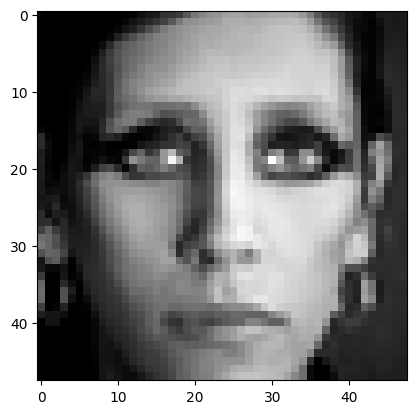

In [22]:
plt.imshow(X[1], cmap="gray")
plt.show()

Creamos el modelo

In [23]:
from tensorflow import keras
from keras.layers import Input, Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Model

def build():
    ip = Input(shape=(48, 48, 1))
    
    conv = Conv2D(filters=32, kernel_size=(1, 1), activation="relu")(ip)
    conv = Conv2D(filters=64, kernel_size=(2, 2), activation="relu")(conv)
    conv = BatchNormalization()(conv)
    conv = MaxPool2D(pool_size=(2, 2))(conv)
    conv = Conv2D(filters=128, kernel_size=(3, 3), activation="relu")(conv)
    conv = Conv2D(filters=256, kernel_size=(3, 3), activation="relu")(conv)  # Cambio a kernel_size=(3, 3)
    conv = BatchNormalization()(conv)
    conv = MaxPool2D(pool_size=(2, 2))(conv)
    
    flatten = Flatten()(conv)
    fc1 = Dense(100, activation="relu")(flatten)  # Reducción del número de neuronas en la capa completamente conectada
    d1 = Dropout(0.3)(fc1)  # Reducción de la tasa de dropout
    output = Dense(3, activation="softmax")(d1)
    
    model = Model(inputs=ip, outputs=output)
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])  # Agregado de lista para metrics
    
    return model

model = build()
model.summary()


2024-02-15 11:02:27.633054: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-15 11:02:27.658602: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-15 11:02:27.958466: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-15 11:02:27.963863: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-15 11:02:29.114773: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        64        
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        8256      
                                                                 
 batch_normalization (Batch  (None, 47, 47, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856 

In [24]:
n=X.shape[0]
frac=int(n*0.8)
y.reshape((n,3,1))
x_train,x_test=X[:frac],X[frac:]
y_train,y_test=y[:frac],y[frac:]

In [25]:
model.fit(x_train,y_train,epochs=40,validation_data=(x_test,y_test))

Epoch 1/40
520/520 [==============================] - 87s 166ms/step - loss: 1.0465 - accuracy: 0.5090 - val_loss: 1.0268 - val_accuracy: 0.4672
Epoch 2/40
520/520 [==============================] - 127s 243ms/step - loss: 0.8295 - accuracy: 0.5998 - val_loss: 0.9629 - val_accuracy: 0.5013
Epoch 3/40
520/520 [==============================] - 162s 311ms/step - loss: 0.7598 - accuracy: 0.6464 - val_loss: 0.8546 - val_accuracy: 0.5829
Epoch 4/40
520/520 [==============================] - 129s 248ms/step - loss: 0.7170 - accuracy: 0.6635 - val_loss: 0.8418 - val_accuracy: 0.6062
Epoch 5/40
520/520 [==============================] - 133s 256ms/step - loss: 0.6811 - accuracy: 0.6852 - val_loss: 0.7072 - val_accuracy: 0.6767
Epoch 6/40
520/520 [==============================] - 153s 294ms/step - loss: 0.6402 - accuracy: 0.7113 - val_loss: 0.7023 - val_accuracy: 0.6774
Epoch 7/40
520/520 [==============================] - 113s 218ms/step - loss: 0.5915 - accuracy: 0.7383 - val_loss: 0.7045 - 

Evaluamos el rendimiento del modelo (porcentaje de acierto)

In [26]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Precisión en los datos de prueba:', test_acc)

130/130 [==============================] - 8s 60ms/step - loss: 1.4355 - accuracy: 0.7116
Precisión en los datos de prueba: 0.7115708589553833


Hacemos la predicción

In [27]:
predictions = model.predict(x_test)

130/130 [==============================] - 8s 58ms/step


Definimos las predicciones y los datos verdaderos.

In [28]:
y_true = y_test.argmax(axis=1)
y_pred = predictions.argmax(axis=1)

In [29]:
y_true

array([1, 0, 2, ..., 2, 0, 0])

In [30]:
y_pred

array([2, 0, 2, ..., 2, 1, 0])

Definimos que a qué emoción pertenece cada número.

In [31]:
def emocion1(n):
    if n == 0: 
        emocion1 = 'happiness'
    elif n == 1: 
        emocion1 = 'sadness'
    elif n == 2: 
        emocion1 = 'neutral'
    return emocion1

Mostramos los primeros 64 números junto con la categoría real y el valor que predice el modelo.

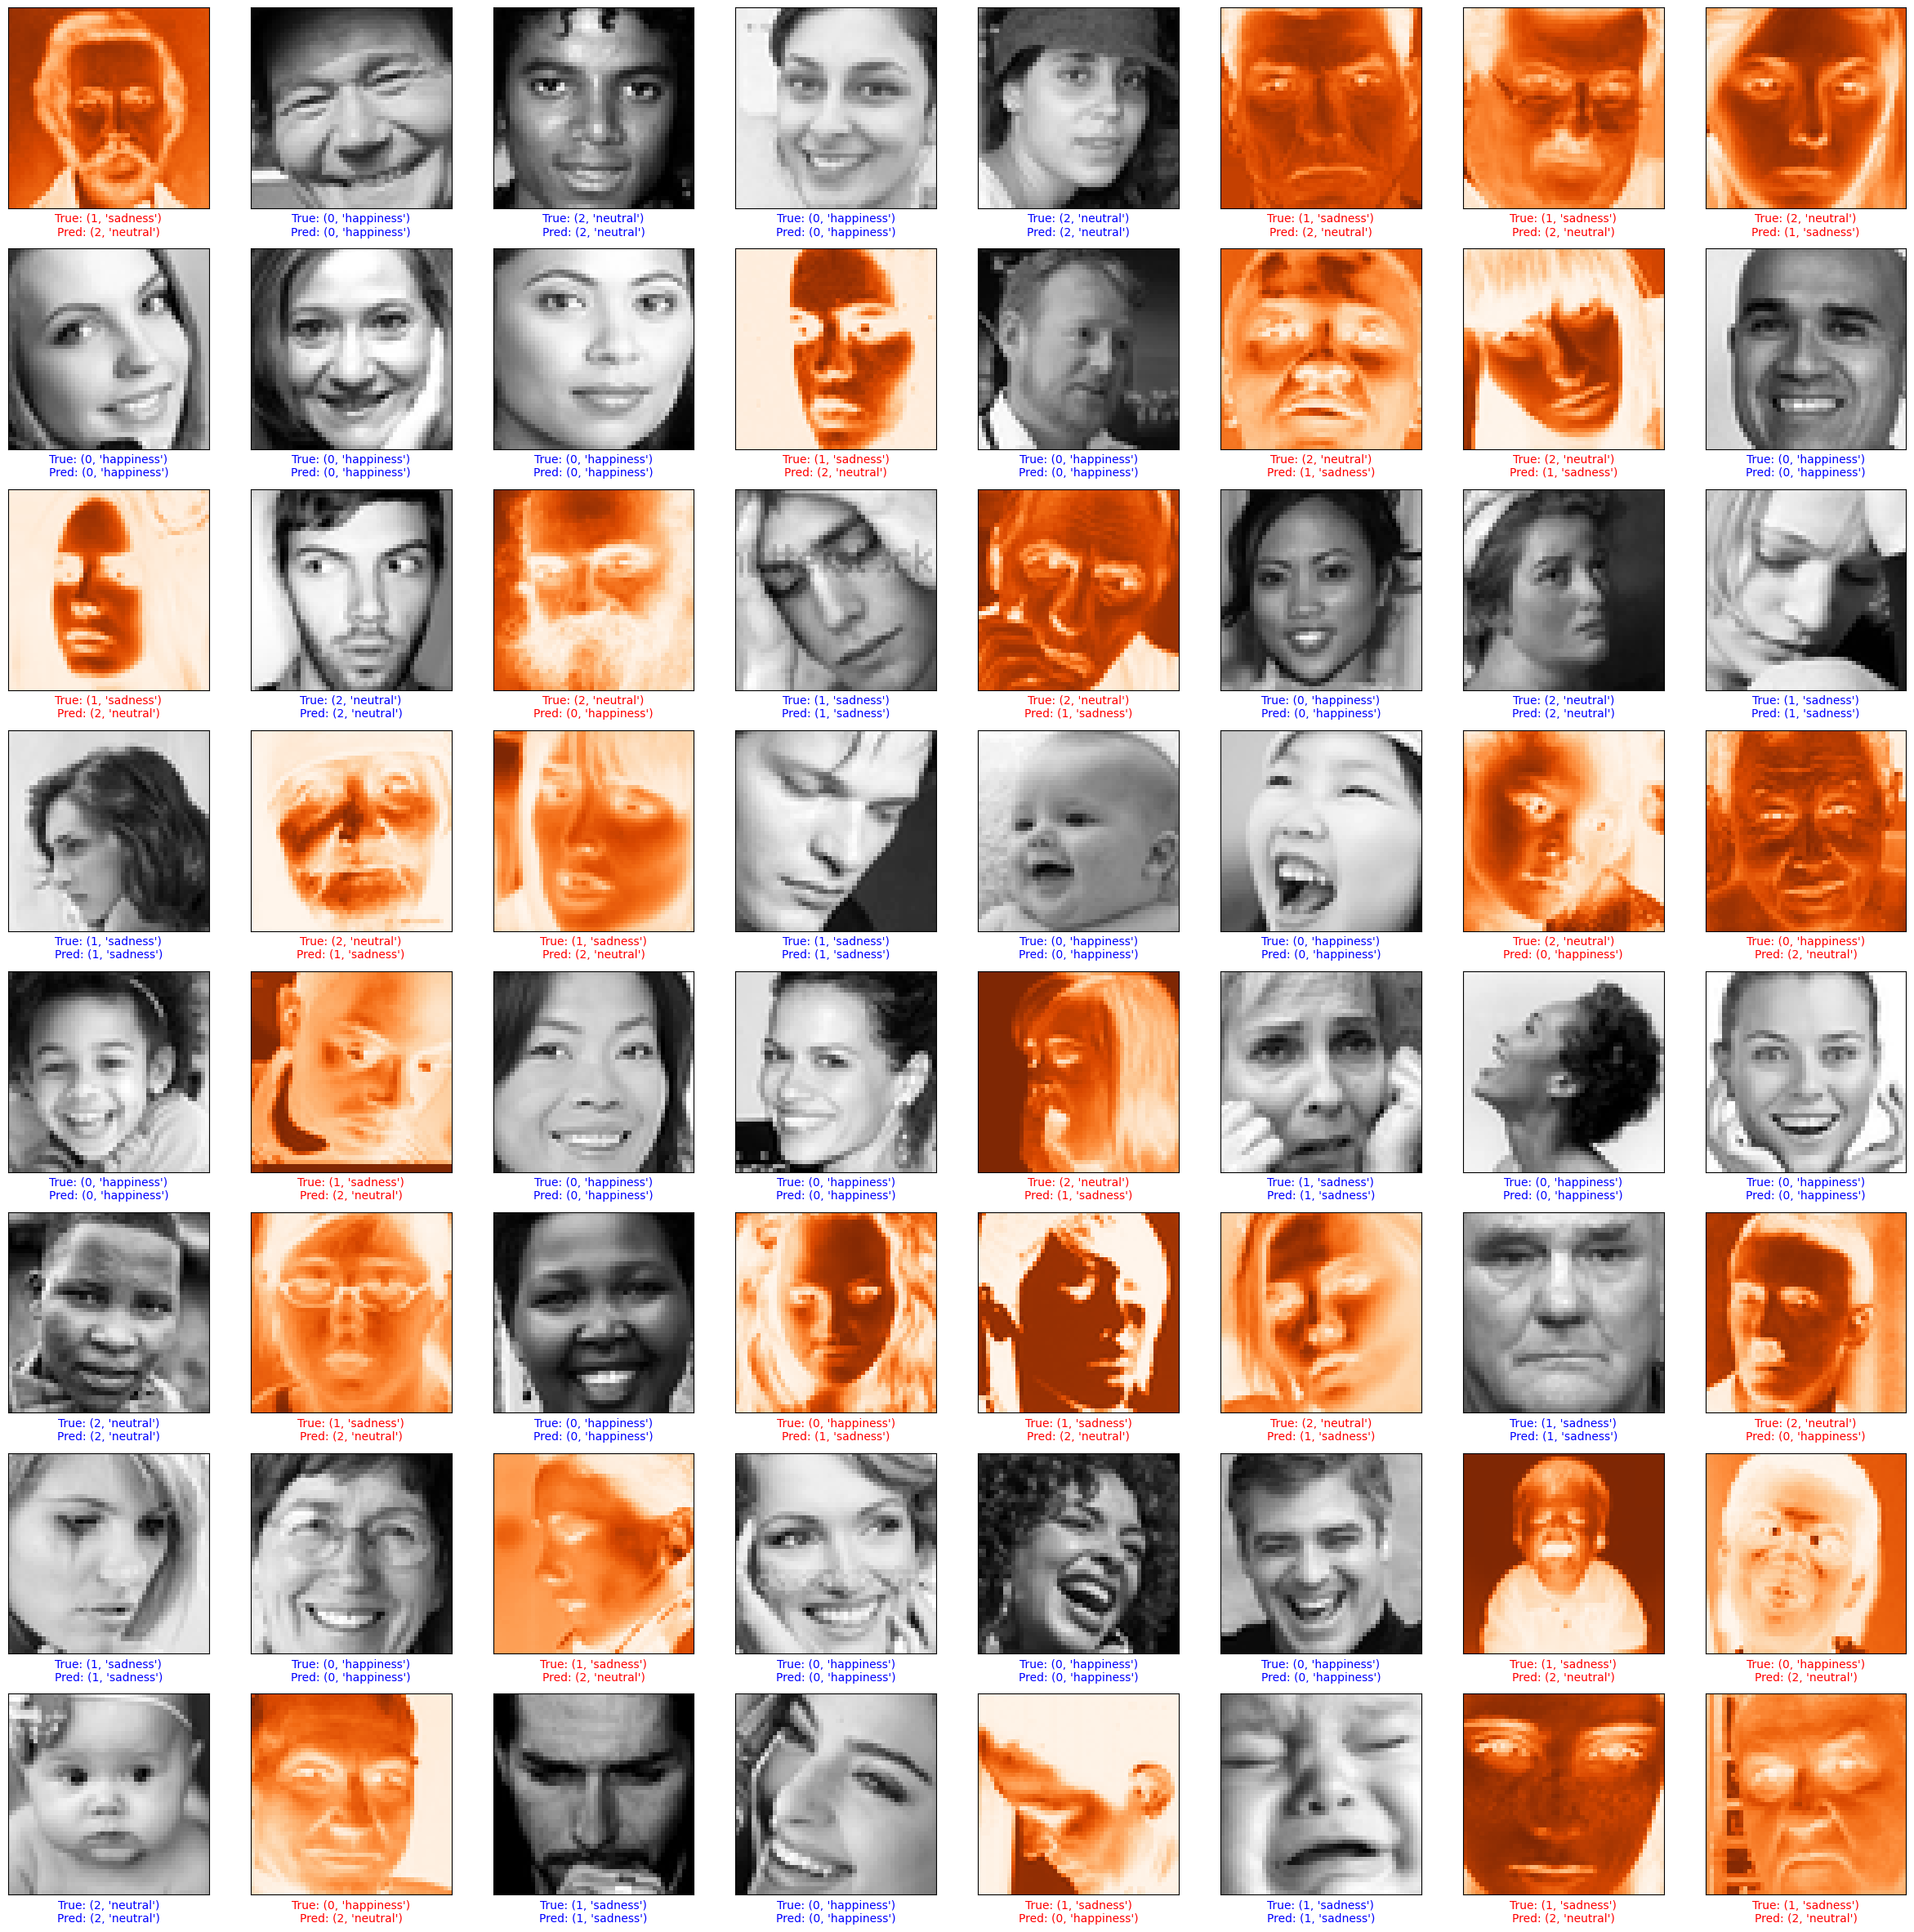

In [32]:
plt.figure(figsize=(30, 30))
for i in range(64):
  plt.subplot(8, 8, i + 1)
  cmap_image = "gray" if y_true[i] == y_pred[i] else "Oranges"
  plt.imshow(x_test[i], cmap=cmap_image)
  plt.yticks([])
  plt.xticks([])
  c = "blue" if y_true[i] == y_pred[i] else "red"
  plt.xlabel(f"True: {y_true[i], emocion1(y_true[i])}\nPred: {y_pred[i], emocion1(y_pred[i])}", color=c)

plt.show()